# An example of splitting patch in Transformer layer


### Load Cat data and required libraries

In [14]:
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt
from torchvision.transforms import Compose, Resize, ToTensor
from einops import rearrange, reduce, repeat

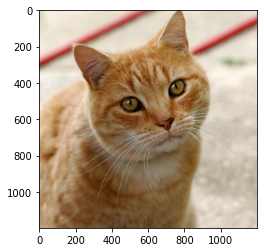

In [15]:
img = Image.open('../cat.jpg')

fig = plt.figure()
plt.imshow(img)

In [17]:
# resize to imagenet size 
transform = Compose([Resize((224, 224)), ToTensor()])
x = transform(img)
x = x.unsqueeze(0) # add batch dim
x.shape

torch.Size([1, 3, 224, 224])

### Patch Transform

torch.Size([1, 196, 768])


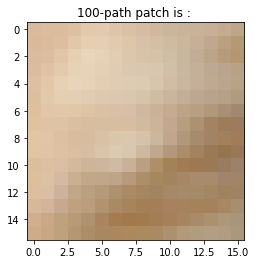

In [68]:
patch_size = 16 # 16 pixels
pathes = rearrange(x, 'b c (h s1) (w s2) -> b (h w) (s1 s2 c)', s1=patch_size, s2=patch_size)
print(pathes.size())

# plt.imshow(rearrange(pathes, 'b (i1 i2) (h w c) -> (i1 h) (i2 w) (b c)', h = 16, w=16, i1=14, i2=14))

plt.title('100-path patch is : ')
plt.imshow(rearrange(pathes[:,100,:], 'b (h w c) -> h w (b c)', h = 16, w=16))

### Path embedding 
- Crop image by 16x16 for non-overlapping patches.
- Then, embedding isze is 

In [75]:
class PatchEmbedding(nn.Module):
    def __init__(self, in_channels: int = 3, patch_size: int = 16, emb_size: int = 768):
        self.patch_size = patch_size
        super().__init__()
        self.projection = nn.Sequential(
            # using a conv layer instead of a linear one -> performance gains
            nn.Conv2d(in_channels, emb_size, kernel_size=patch_size, stride=patch_size),
            Rearrange('b e (h) (w) -> b (h w) e'),
        )
                
    def forward(self, x: Tensor) -> Tensor:
        x = self.projection(x)
        return x
    
PatchEmbedding()(x).shape

torch.Size([1, 196, 768])

### Cls Token